The data for this project is extracted from the dataset complied by Inside Airbnb from publicly available information from the Airbnb site from October 3, 2015 on the listings from Washington, D.C.  http://insideairbnb.com/get-the-data.html.  The goal of the project is to predict the optimal price to rent a place. 

In [51]:
import pandas as pd
import numpy as np
dc_listings = pd.read_csv('dc_airbnb.csv')
dc_listings.head(2)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC


#### A simple prediction using 5 nearest neighbors

In [52]:
# Euclidean distance between the living space, which can accommodate 3 people, and 1st living space in the Dataframe
first_distance = abs(dc_listings.iloc[0]['accommodates']-3)  
print(first_distance)

1


In [53]:
# Distances from listing (3)
first_distance = dc_listings['accommodates'] - 3

#create new distance column
dc_listings['distance'] = first_distance.apply(abs)
print(dc_listings['distance'].value_counts())

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64


There are 461 living spaces that can accommodate 3 people (ED = 0).  

In [54]:
# randomize the ordering of the dataset and then sort the Dataframe by the distance column to avoid bias.
np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
574,100%,100%,1,2,Private room,1.0,1.0,1.0,$125.00,NaN,$300.00,1,4,149,38.913548,-77.031981,Washington,20009,DC,1
1593,87%,100%,2,2,Private room,1.0,1.5,1.0,$85.00,$15.00,NaN,1,30,49,38.953431,-77.030695,Washington,20011,DC,1
3091,100%,NaN,1,1,Private room,1.0,0.5,1.0,$50.00,NaN,NaN,1,1125,1,38.933491,-77.029679,Washington,20010,DC,2
420,58%,51%,480,2,Entire home/apt,1.0,1.0,1.0,$209.00,$150.00,NaN,4,730,2,38.904054,-77.051991,Washington,20037,DC,1
808,100%,95%,3,12,Entire home/apt,5.0,2.0,5.0,$215.00,$135.00,$100.00,2,1825,34,38.906118,-76.988873,Washington,20002,DC,9


In [55]:
dc_listings = dc_listings.sort_values('distance')
print(dc_listings.iloc[0:10]['price'] )

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object


In [56]:
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
577,98%,52%,49,3,Private room,1.0,1.0,2.0,$185.00,NaN,NaN,2,14,1,38.908356,-77.028146,Washington,20005,DC,0
2166,100%,89%,2,3,Entire home/apt,1.0,1.0,1.0,$180.00,NaN,$100.00,1,14,10,38.905808,-77.000012,Washington,20002,DC,0
3631,98%,52%,49,3,Entire home/apt,1.0,1.0,2.0,$175.00,NaN,NaN,3,14,1,38.889065,-76.993576,Washington,20003,DC,0
71,100%,94%,1,3,Entire home/apt,1.0,1.0,1.0,$128.00,$40.00,NaN,1,1125,9,38.879960,-77.006491,Washington,20003,DC,0
1011,NaN,NaN,1,3,Entire home/apt,0.0,1.0,1.0,$115.00,NaN,NaN,1,1125,0,38.907382,-77.035075,Washington,20005,DC,0


In [57]:
stripped = dc_listings['price'].str.replace(',', '').str.replace('$', '').astype(float)
dc_listings['price'] = stripped

#calculate mean of five random neighbors
mean_price = dc_listings['price'].head().mean()
print(mean_price)

156.6


In [79]:
dc_listings['accommodates'].value_counts()

2     1578
4      680
3      457
1      336
6      276
5      161
8       73
7       35
10      22
9       17
12       9
16       8
11       7
15       6
14       4
13       2
Name: accommodates, dtype: int64

In [58]:
# This function predicts the price for any listing living space based on known the number of people it accommodates.
def predict_price(new_listing):
    temp_df = dc_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df['price'].head()
    predicted_price = nearest_neighbors.mean()
    return predicted_price

acc_one = predict_price(1)
acc_two = predict_price(2)
acc_three = predict_price(3)
acc_four = predict_price(4)
print(acc_one)
print(acc_two)
print(acc_three)
print(acc_four)

78.8
126.0
194.8
197.6


#### Evaluating Model Performance: train/test validation

In [84]:
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

def predict_price(new_listing):
    ## DataFrame.copy() performs a deep copy
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)

test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)
test_df['predicted_price'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


172.0    393
273.0    151
98.8     111
84.0      72
293.6     67
233.4     45
223.8     14
273.8     12
292.4      4
601.6      2
377.6      2
574.6      2
504.8      2
442.0      1
729.0      1
Name: predicted_price, dtype: int64

In [86]:
test_df['accommodates'].value_counts()

2     393
4     151
3     111
1      72
6      67
5      45
8      14
7      12
9       4
16      2
15      2
12      2
10      2
14      1
11      1
Name: accommodates, dtype: int64

In [87]:
train_df['accommodates'].value_counts()

2     1185
4      529
3      346
1      264
6      209
5      116
8       59
7       23
10      20
9       13
12       7
11       6
16       6
15       4
14       3
13       2
Name: accommodates, dtype: int64

In [89]:
# use error metric to measure how off predicted price were from actual price for the living spaces in test dataset
error = np.absolute(test_df['predicted_price'] - test_df['price'])
mae = error.mean()

# use mean squared error to penalize predicted values further away from the actual value
se = error**2
mse = se.mean()
print(mae, '    ', mse)

92.83617747440273      22671.057428896474


In [91]:
# train another model and then compare the mse to see which model performs better on a relative basis

def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return predicted_price

test_df['predicted_price'] = test_df['bathrooms'].apply(lambda x: predict_price(x))
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**2
mse = test_df['squared_error'].mean()
predicted_price = test_df['bathrooms'].apply(lambda x: predict_price(x))
squared_error = (predicted_price - test_df['price'])**2
mse = squared_error.mean()
rmse = mse**0.5
print(mse, '   ', rmse)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


19127.704618885095     138.30294508391748


An RMSE value of 138 implies that the model pridiction could be off by 138 dollars on average for the predicted price. Given that most of the living spaces are listed at just a few hundred dollars, this error is too big to be useful.   The ratio of MAE to RMSE can indicate if there are large but infrequent errors, which leads to greater RMSE/MSE.

In [ ]:
# individual errors grows quadratically and has a different effect on the final RMSE value
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])

mae_one = errors_one.mean()
rmse_one = (sum((x**2 for x in errors_one))/len(errors_one))**0.5
mae_two = errors_two.mean()
rmse_two = (sum((x**2 for x in errors_two))/len(errors_two))**0.5
print(mae_one, '  ', mae_two, '  ', rmse_one, '  ', rmse_two)

#### Using multivariate K-Nearest Neighbors to find better models

In [94]:
np.random.seed(1)
dc_listings = pd.read_csv('dc_airbnb.csv')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings.head(2)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
574,100%,100%,1,2,Private room,1.0,1.0,1.0,125.0,NaN,$300.00,1,4,149,38.913548,-77.031981,Washington,20009,DC
1593,87%,100%,2,2,Private room,1.0,1.5,1.0,85.0,$15.00,NaN,1,30,49,38.953431,-77.030695,Washington,20011,DC


In [95]:
# remove columns that don't work well with the distance equation
drop_columns = ['room_type', 'city', 'state', 'latitude', 'longitude', 'zipcode', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count']
dc_listings = dc_listings.drop(drop_columns, axis=1)
print(dc_listings.isnull().sum())

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64


In [96]:
dc_listings = dc_listings.drop(['cleaning_fee', 'security_deposit'], axis=1)
dc_listings = dc_listings.dropna(axis=0)
print(dc_listings.isnull().sum())

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64


In [97]:
# Using normalization to preserve the distribution of the values in each column while aligning the scales.
# Normalizing the values in each column to the standard normal distribution (mean of 0, standard deviation of 1)
normalized_listings = (dc_listings - dc_listings.mean()) / (dc_listings.std())
normalized_listings['price'] = dc_listings['price']
normalized_listings.head(3)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505


In [98]:
# increasing the number of attributes the model uses. 
# Calculate the Euclidean distance using only the accommodates and bathrooms features in first row and fifth row 
from scipy.spatial import distance
first_listing = normalized_listings.iloc[0][['accommodates', 'bathrooms']]
fifth_listing = normalized_listings.iloc[4][['accommodates', 'bathrooms']]
first_fifth_distance = distance.euclidean(first_listing, fifth_listing)
print(first_fifth_distance)

5.272543124668404


In [99]:
# Use two columns to train a k-nearest neighbors model 
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5, algorithm = 'brute')
train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
train_features = train_df[['accommodates', 'bathrooms']]
train_target = train_df['price']
knn.fit(train_features, train_target)
predictions = knn.predict(test_df[['accommodates', 'bathrooms']])

In [100]:
from sklearn.metrics import mean_squared_error
train_columns = ['accommodates', 'bathrooms']
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute', metric='euclidean')
knn.fit(train_df[train_columns], train_df['price'])
predictions = knn.predict(test_df[train_columns])
two_features_mse = mean_squared_error(test_df['price'], predictions)
two_features_rmse = two_features_mse ** 0.5
print(two_features_mse, two_features_rmse)

15660.39795221843 125.14151170662127


In [101]:
# Use four columns to train a k-nearest neighbors model 
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
knn.fit(train_df[features], train_df['price'])
four_predictions = knn.predict(test_df[features])
four_mse = mean_squared_error(test_df['price'] , four_predictions)
four_rmse = four_mse ** 0.5
print(four_mse, '  ', four_rmse)

13425.567918088738    115.86875298409291


In [102]:
# Use all of the columns except the price column to train a k-nearest neighbors model 
features = train_df.columns.tolist()
features.remove('price')
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
knn.fit(train_df[features], train_df['price'])
all_features_predictions = knn.predict(test_df[features])
all_features_mse = mean_squared_error(test_df['price'], all_features_predictions)
all_features_rmse = four_mse ** 0.5
print(all_features_mse, '  ', all_features_rmse)

15455.168464163822    115.86875298409291


#### Hyperparameter Optimization:  varying the k value to improve the behavior of the model independently of the actual data

In [103]:
hyper_params = [1,2,3,4,5]
mse_values = []
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
print(mse_values)

[25897.758816837315, 14829.874004550626, 14507.138794084187, 14830.159485210466, 13425.567918088738]


In [104]:
# expand grid search all the way to a k value of 20
hyper_params = [x for x in range(1,21)]
mse_values = []
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i, algorithm = 'brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
print(mse_values)

[25897.758816837315, 14829.874004550626, 14507.138794084187, 14830.159485210466, 13425.567918088738, 12964.574232081912, 13078.831487543826, 13326.530112343573, 13515.391859436226, 13970.468134243461, 14026.612266004755, 14300.08922702566, 14386.92169019394, 14412.359470409323, 14459.322502844141, 14613.371373720136, 14705.728001700578, 14681.607002907345, 14648.858142752248, 14571.654610352673]


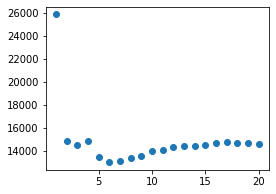

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(4,3))
plt.scatter(hyper_params, mse_values)

the lowest MSE value was achieved at the k value of 6. As we increased k past 6

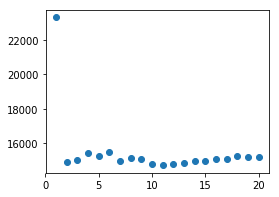

In [54]:
# Use all of the columns except the price column to train a k-nearest neighbors model 
hyper_params = [x for x in range(1,21)]
mse_values = list()
features = train_df.columns
features = features.drop('price')
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(predictions, test_df['price'])
    mse_values.append(mse)
plt.figure(figsize=(4,3))
plt.scatter(hyper_params, mse_values)

more features didn't translate into better model behavior

In [105]:
# find the lowest MSE value using two or three features
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]
two_mse_values = []
three_mse_values = []
# using dicgtionary to store (k: mse) values
two_hyp_mse = {}
three_hyp_mse = {}

for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i, algorithm='brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df['price'], predictions)
    two_mse_values.append(mse)
    
# find the lowest MSE value using two features    
two_lowest_mse = two_mse_values[0]
two_lowest_k = 1
for k, mse in enumerate(two_mse_values):
    if mse < two_lowest_mse:
        two_lowest_mse = mse
        two_lowest_k = k + 1
    
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i, algorithm='brute')
    knn.fit(train_df[three_features], train_df['price'])
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df['price'], predictions)
    three_mse_values.append(mse)

# find the lowest MSE value using three features
three_lowest_mse = three_mse_values[0]
three_lowest_k = 1
for k,mse in enumerate(three_mse_values):
    if mse < three_lowest_mse:
        three_lowest_mse = mse
        three_lowest_k = k + 1
        
two_hyp_mse[two_lowest_k] = two_lowest_mse
three_hyp_mse[three_lowest_k] = three_lowest_mse

print(two_hyp_mse, three_hyp_mse)  

{6: 15654.783244848944} {5: 13285.701069397044}


Three features with 5 neighbors resulted in smaller mse

#### Cross Validation

In [18]:
#  holdout validation = 2-fold cross-validation
split_one = dc_listings[:1862]
split_two = dc_listings[1862:]

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one
# First half
model = KNeighborsRegressor()
model.fit(train_one[["accommodates"]], train_one["price"])
test_one_predicted_price = model.predict(test_one[["accommodates"]])
iteration_one_rmse = mean_squared_error(test_one["price"], test_one_predicted_price)**(1/2)

# Second half
model.fit(train_two[["accommodates"]], train_two["price"])
test_two_predicted_price = model.predict(test_two[["accommodates"]])
iteration_two_rmse = mean_squared_error(test_two["price"], test_two_predicted_price)**(1/2)

avg_rmse = np.mean([iteration_two_rmse, iteration_one_rmse])
print(iteration_one_rmse, ' ', iteration_two_rmse, ' ' , 'mean error =', avg_rmse)

152.41215713363513   127.63290337381856   mean error = 140.02253025372684


In [117]:
# k-fold cross-validation
# adding a 'fold' column to dc_listings
dc_listings.loc[dc_listings.index[0:745], "fold"] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5
dc_listings['fold'].value_counts()
dc_listings['fold'].value_counts(dropna=False)

2.0    745
1.0    745
4.0    744
3.0    744
5.0    693
Name: fold, dtype: int64

In [118]:
# training & validation
fold_ids = [1,2,3,4,5]
def train_and_validate(df, folds):
    fold_rmses = []
    for fold in folds:
        # Train
        model = KNeighborsRegressor()
        train = df[df["fold"] != fold]
        test = df[df["fold"] == fold].copy()
        model.fit(train[["accommodates"]], train["price"])
        # Predict
        labels = model.predict(test[["accommodates"]])
        test["predicted_price"] = labels
        mse = mean_squared_error(test["price"], test["predicted_price"])
        rmse = mse**(1/2)
        fold_rmses.append(rmse)
    return fold_rmses
rmses = train_and_validate(dc_listings, fold_ids)
print('avg_rmse: ', sum(rmses)/len(rmses))

avg_rmse:  128.88661938824302


In [126]:
# using kFold() and cross_val_score() from sklearn.model_selection
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(5, shuffle = True, random_state = 1)
knn = KNeighborsRegressor()
mses = cross_val_score(knn, dc_listings[['accommodates']], dc_listings['price'], scoring = 'neg_mean_squared_error', cv = kf)
rmses = np.sqrt(np.abs(mses))
avg_rmse = np.mean(rmses)
print(rmses)
print('avg_rmse: ', avg_rmse)

[148.57324706 108.34713663 137.74874572 108.02754316 139.79990703]
avg_rmse:  128.49931592107862


In [140]:
num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
rmses_ls = []
std_rmse_ls = []
for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn, dc_listings[["accommodates"]], dc_listings["price"], scoring = "neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    rmses_ls.append(avg_rmse)
    std_rmse_ls.append(std_rmse)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "  std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  123.17064375729854   std RMSE:  4.2689330359893765
5 folds:  avg RMSE:  128.49931592107862   std RMSE:  16.97893890878854
7 folds:  avg RMSE:  127.97513377042846   std RMSE:  20.49543527053172
9 folds:  avg RMSE:  123.61872669423639   std RMSE:  24.383915795024848
10 folds:  avg RMSE:  127.14768452083968   std RMSE:  24.12971080464867
11 folds:  avg RMSE:  127.6162429896584   std RMSE:  29.36740885935232
13 folds:  avg RMSE:  122.74835655496307   std RMSE:  32.37835226566323
15 folds:  avg RMSE:  122.75764540123978   std RMSE:  32.89326016096263
17 folds:  avg RMSE:  123.00505315300288   std RMSE:  35.48871237937227
19 folds:  avg RMSE:  122.14821235192935   std RMSE:  35.17365639938169
21 folds:  avg RMSE:  121.10942246881532   std RMSE:  37.115747446720576
23 folds:  avg RMSE:  124.93985894775318   std RMSE:  39.278718711279566


std of the RMSE values is a proxy of model's variance while the average RMSE is a proxy for a model's bias.

Text(0.5, 1.0, 'rsme')

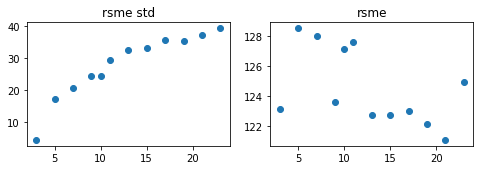

In [146]:
plt.figure(figsize = (8,5))
plt.subplot(2, 2, 1)
plt.scatter(num_folds, std_rmse_ls)
plt.title('rsme std')
plt.subplot(2, 2, 2)
plt.scatter(num_folds, rmses_ls)
plt.title('rsme')